# California Housing Price
The purpose of this project is to predict median house valuse in California districts, given a number of features from these districts comprised in California housing price dataset. Simple predictive models are built with Scikit-Learn library.

### Setup

In [163]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "1.0"
import urllib

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Load the Data

In [127]:
housing = pd.read_csv("housing.csv")
housing.head()
# the outcome variable (to predict) is median_house_value
# note that the median_income is in units of 10K

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [128]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [130]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [129]:
# ocean_proximity is the only categorical variable in dataset
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

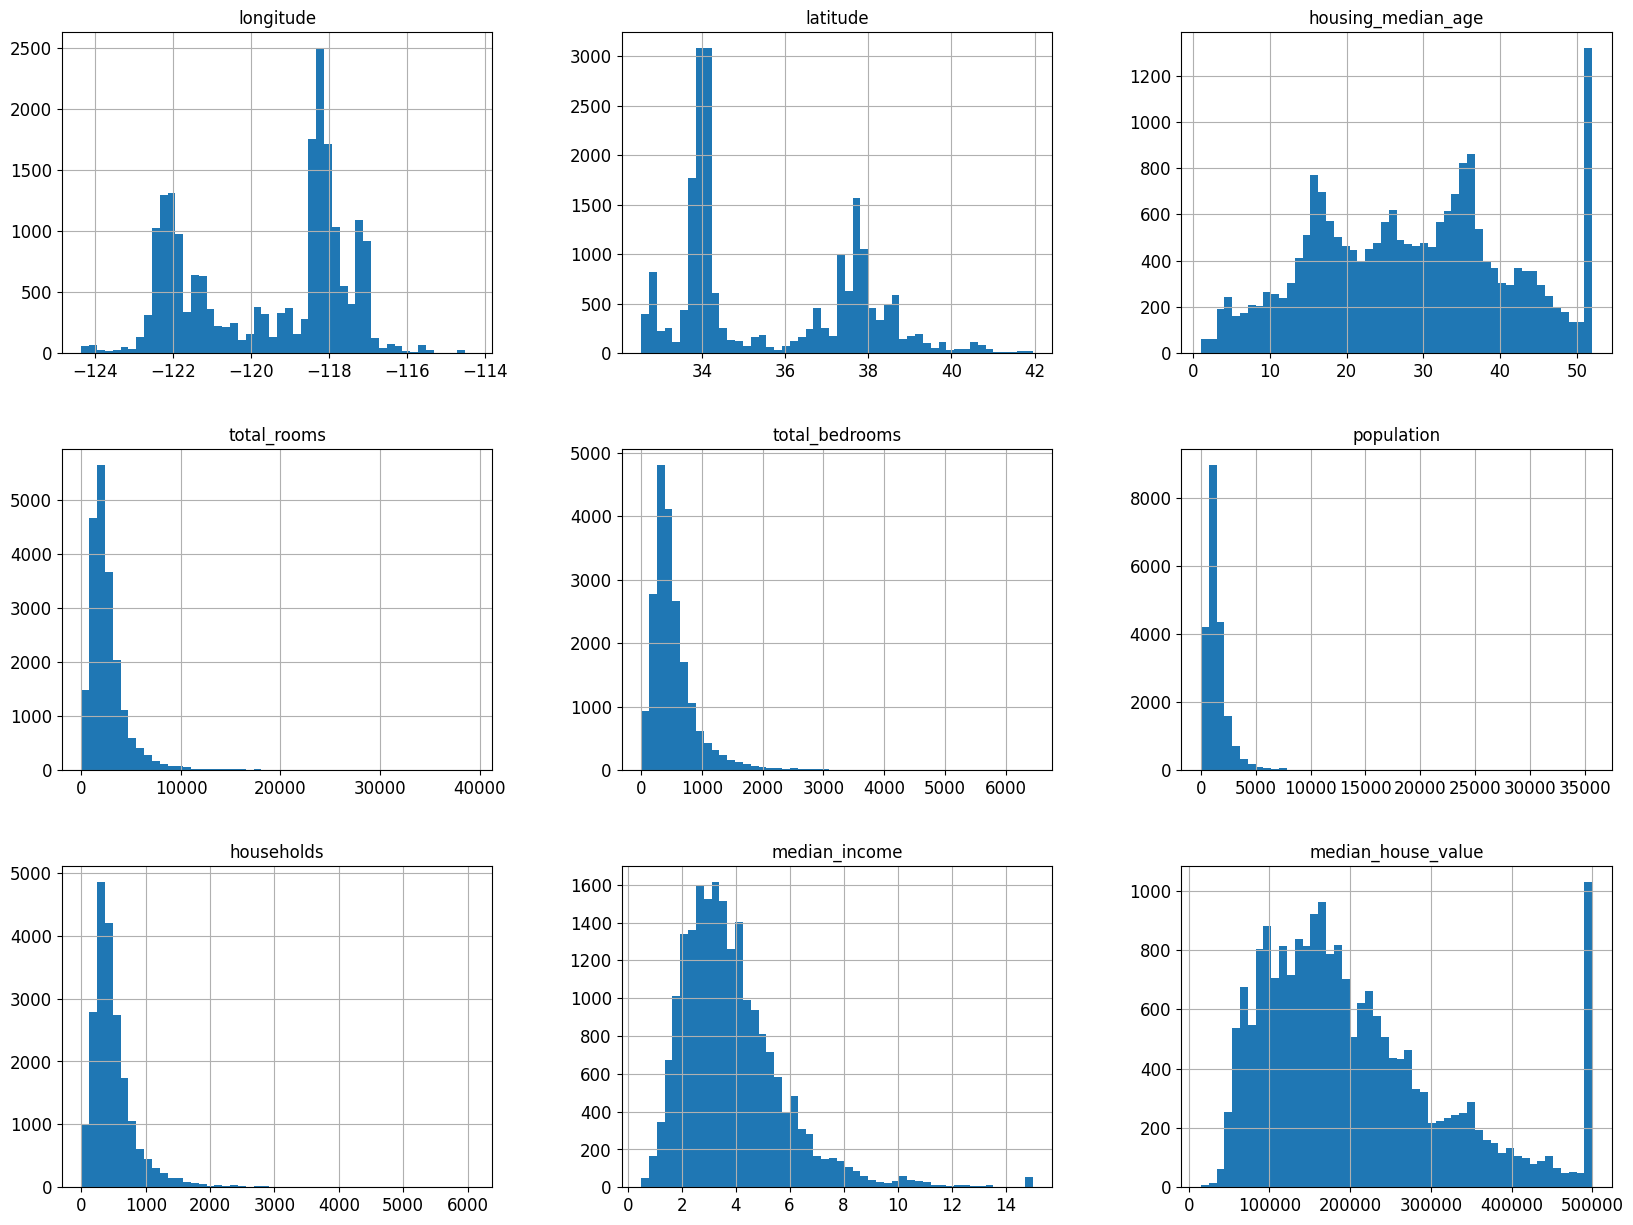

In [131]:
# visualize histogram for numeric values
housing.hist(bins=50, figsize=(20,15))

### Create a Test Set

In [132]:
# to make this notebook identical at every run
np.random.seed(43)

In [133]:
# split data into train and test sets, for model training and evaluation

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [137]:
print(train_set.shape)
print(test_set.shape)
housing.head()

(16512, 10)
(4128, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [151]:
# building 5 income category/bins
# based on the median_income histogram it is obvious that the most values are between 1 to 7
# so I decided to create bins like this: [0, 1.5, 3.0, 4.5, 6, np.inf]
# this mean my bins will be like ( [0,1.5], (1.5,3], (3,4.5], (4.5,6], (6,np.inf] )

housing["income_cat"] = pd.cut(housing.median_income,
                               bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


<Axes: >

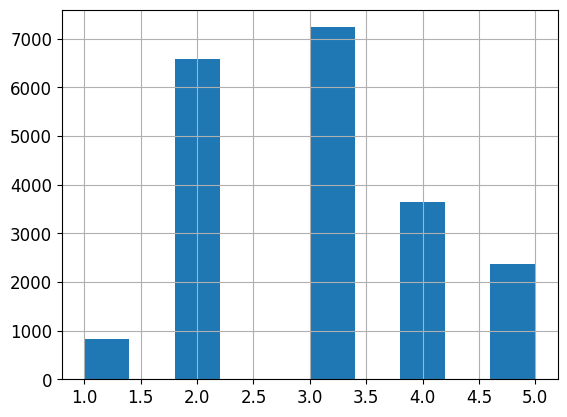

In [152]:
print(housing.income_cat.value_counts())
housing.income_cat.hist()

## EDA

In [153]:
housing = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

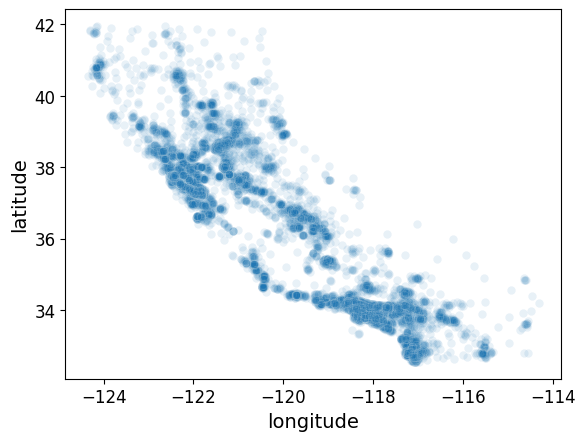

In [159]:
sns.scatterplot(x=housing["longitude"], y=housing["latitude"], alpha=0.1)

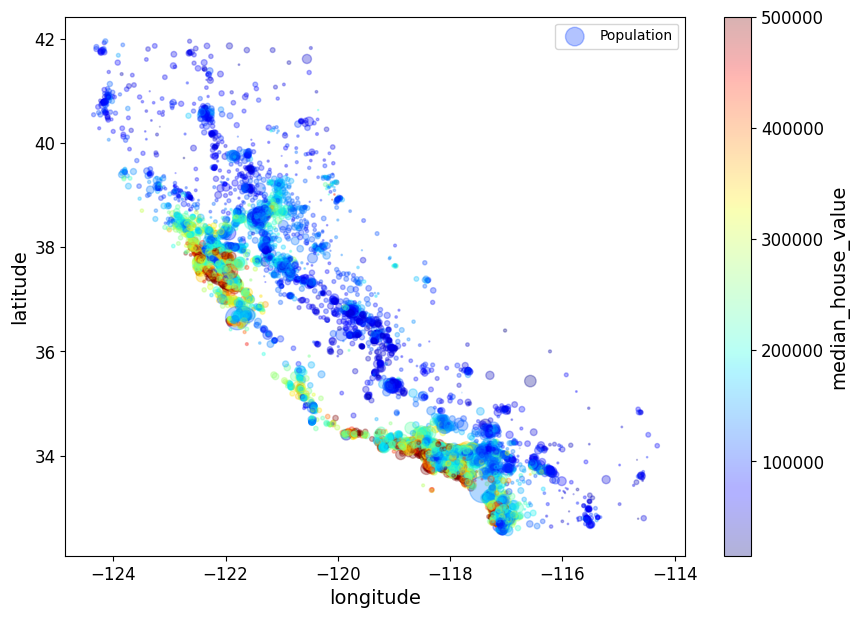

In [161]:
# representing median_house_value with colorbar, and size of population 
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
             s=housing["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False
)
plt.legend()

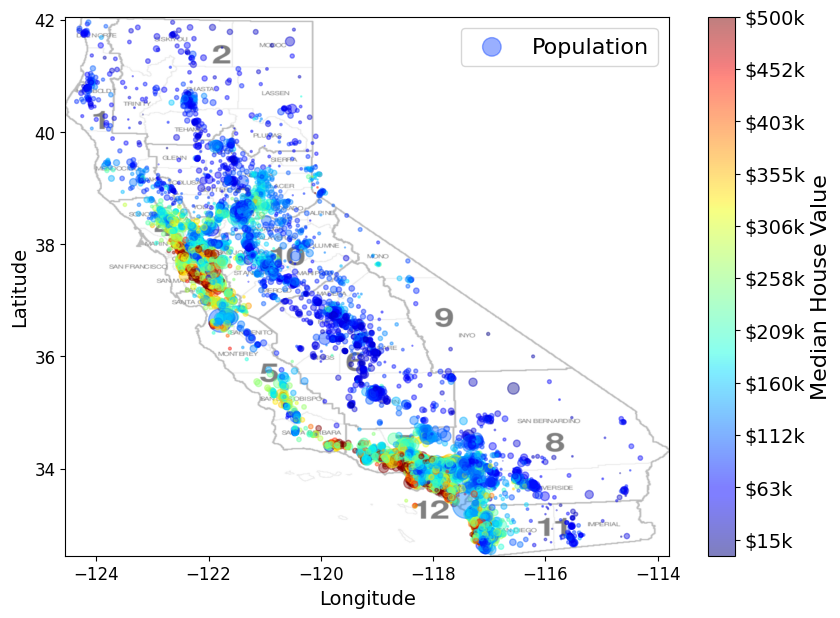

In [171]:
# Produce the plot on the California map for better understanding

import matplotlib.image as mpimg
california_img = mpimg.imread("./california2.png")

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

## Looking for correlation between numeric variables

In [175]:
corr_matrix = housing.drop(columns=["ocean_proximity"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# we see that median_income is mostly positiveley correlated with median_house_value

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

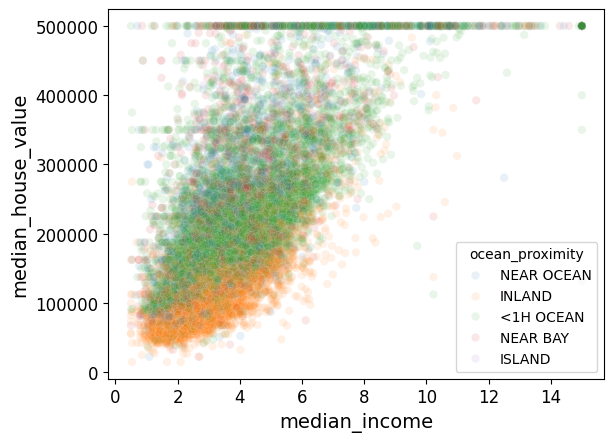

In [184]:
# build a scatterplot for pair of two variables which are median_income & median_house_value
sns.scatterplot(x=housing["median_income"], y=housing["median_house_value"], hue=housing["ocean_proximity"], alpha=0.1)

### Experimenting with attribute/variable combinations

In [185]:
# adding new variables including 
#   - rooms_per_household
#    - bedrooms_per_room
#    - population_per_household

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [186]:
# check again if any of the added numeric variables show good/better correlation with outcome variable.
corr_matrix = housing.drop(columns="ocean_proximity").corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# we can see that rooms_per_household has a noticeable correlation with almost 16% with median_house_value

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

(0.0, 10.0)

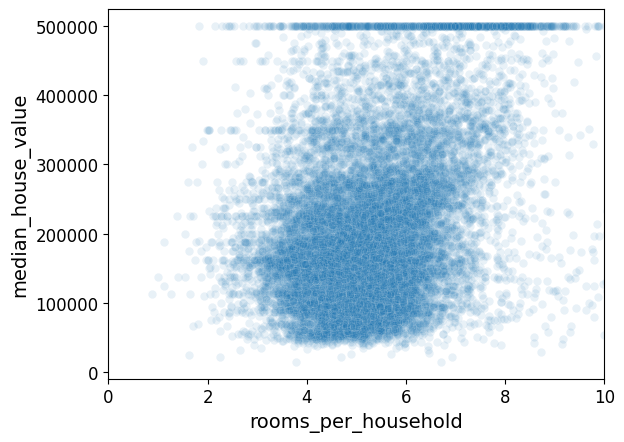

In [191]:
sns.scatterplot(x=housing["rooms_per_household"], y=housing["median_house_value"], alpha=0.1)
plt.xlim(0,10)

# Data Preprocessing

In [194]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095


In [199]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16512 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [201]:
# handling missing values
housing[housing.isnull().any(axis=1)]

# there is no missing values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


### Handling Text and Categorical Columns

In [209]:
# convert ocean_proximity to numerical values using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [226]:
housing = pd.get_dummies(housing, columns=["ocean_proximity"])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,5.017657,0.200576,3.691814,False,False,False,False,True
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4.473545,0.232703,1.738095,False,False,False,False,True
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,5.645833,0.174486,2.723214,False,False,False,False,True
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4.002817,0.258269,3.994366,False,False,False,False,True
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,6.268421,0.180940,2.300000,False,True,False,False,False


# Train & Evaluate Model

#### 1. Linear Regression

In [227]:
print(housing.shape)
print(test_set.shape)

(16512, 17)
(4128, 10)


In [240]:
# fitting a simple linear regression to predict the median_house_value
from sklearn.linear_model import LinearRegression

X = housing.drop(columns=["median_house_value"])
y = housing["median_house_value"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [243]:
# let's try the full preprocessing pipeline on a few training instances

housing_labels = housing["median_house_value"]

some_data = X.iloc[:5]
some_labels = y.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [181746.54359617 290558.74973506 244957.5001777  146498.51061398
 163230.42393939]
Labels: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [244]:
# let's see what rmse error the linear regression achieves on the training set

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(round(lin_rmse, 2))

67593.21


In [245]:
# onother useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, housing_predictions)
print(round(lin_mae, 2))

48785.16


#### 2. K-nearest Neighbors

In [247]:
# fitting a simple nearest neighbour regression to predict the median house values

from sklearn.neighbors import KNeighborsRegressor
neigh_reg = KNeighborsRegressor(n_neighbors=1)
neigh_reg.fit(X, y)

KNeighborsRegressor(n_neighbors=1)

In [248]:
# let's see what rmse error the nerest neighbour model achieves on training set;

housing_predictions = neigh_reg.predict(X)
neigh_mse = mean_squared_error(y, housing_predictions)
neigh_rmse = np.sqrt(neigh_mse)
neigh_rmse

# we can see here that this model clearly overfits the training set due to a 0 error on training set;


0.0

### 3. Decision Tree

In [249]:
# fitting a simple decision tree with depth 3

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [251]:
# let's see what rmse error the decision tree achieves on training set;
# this is a capable model which can capture non-linear patterns in the data;

housing_predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(round(tree_rmse, 2))
# we can see the error on the train set is 0, so it overfits

0.0


In [252]:
# the above tree model was fully grown with no limit on its size; let us train one with up to 3 levels
# which is not fully grown so would overfit less

tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X, y)
housing_predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(round(tree_rmse, 2))

68948.54


### 4.Random Forest

In [253]:
# as seen in class, a random forest is a set of trees working together attempting to achieve a better prediction;
# fitting a simple random forest model consisting of an ensemble of 100 trees (n_estimators) here
# whose predictions are averaged by the random forest model;
# ensemble models, in particular random forests, are powerful as they combine the results produced by several models

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X, y)

RandomForestRegressor(random_state=42)

In [254]:
# evaluating the random forest model on the training set;

housing_predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(round(forest_rmse, 2))

18528.61
